In [134]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("mulit_classification_data.csv")
df.head()

In [16]:
df.describe()

X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000   
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count   1941.000000   1941.000000       1.941000e+03            1941.000000   
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187    426.482879       5.122936e+05              32.134276   
min        2.000000      1.000000       2.500000e+02               0.000000   
25%       15.000000     13.000000       9.522000e+03              63.000000   
50%       26.000000     25.000000       1.920200e+04              90.000000   
75%       84.000000     83.000000       8.301100e+04             106.000000   
max    10449.000000  18152.000000       1.159141e+07             203.000000   

       Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
count            1941.000000  ...        1941.000000       1941.000000   
mean              130.193715  ...           0.083288         -0.131305   
std                18.690992  ...           0.500868          0.148767   
min                37.000000  ...          -0.991000         -0.998900   
25%               124.000000  ...          -0.333300         -0.195000   
50%               127.000000  ...           0.095200         -0.133000   
75%               140.000000  ...           0.511600         -0.066600   
max               253.000000  ...           0.991700          0.642100   

       SigmoidOfAreas       Pastry    Z_Scratch     K_Scatch       Stains  \
count     1941.000000  1941.000000  1941.000000  1941.000000  1941.000000   
mean         0.585420     0.081401     0.097888     0.201443     0.037094   
std          0.339452     0.273521     0.297239     0.401181     0.189042   
min          0.119000     0.000000     0.000000     0.000000     0.000000   
25%          0.248200     0.000000     0.000000     0.000000     0.000000   
50%          0.506300     0.000000     0.000000     0.000000     0.000000   
75%          0.999800     0.000000     0.000000     0.000000     0.000000   
max          1.000000     1.000000     1.000000     1.000000     1.000000   

         Dirtiness        Bumps  Other_Faults  
count  1941.000000  1941.000000   1941.000000  
mean      0.028336     0.207110      0.346728  
std       0.165973     0.405339      0.476051  
min       0.000000     0.000000      0.000000  
25%       0.000000     0.000000      0.000000  
50%       0.000000     0.000000      0.000000  
75%       0.000000     0.000000      1.000000  
max       1.000000     1.000000      1.000000  

[8 rows x 34 columns]

In [5]:
print("중복된 데이터의 비율", df.duplicated().sum()/len(df))  # 중복 데이터 x

중복된 데이터의 비율 0.0


In [6]:
# 결측치 처리 -> 결측치 0  
df.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [42]:
# target 데이터 -> int bool 타입으로 변경
target_df=[
              df['Pastry'],
            df['Z_Scratch'],
            df['K_Scatch'],
            df['Stains'],
            df['Dirtiness'],
            df['Bumps'],
            df['Other_Faults'] 
]

targets = list(map(lambda i: i.astype(bool),target_df))


In [52]:
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['class']=np.select(targets,choices)
df['class']

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: class, Length: 1941, dtype: object

In [78]:
df.drop( df[choices].columns, axis=1, inplace=True)

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
...         ...        ...        ...        ...           ...          ...   
1936        249        277     325780     325796           273           54   
1937        144        175     340581     340598           287           44   
1938        145        174     386779     386794           292           40   
1939        137        170     422497     422528           419           97   
1940       1261       1281      87951      87967           103           26   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0              44              24220                     76   
1              30              11397                     84   
2              19               7972                     99   
3              45              18996                     99   
4             260             246930                     37   
...           ...                ...                    ...   
1936           22              35033                    119   
1937           24              34599                    112   
1938           22              37572                    120   
1939           47              52715                    117   
1940           22              11682                    101   

      Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
0                       108  ...         0.4706         1.0000   
1                       123  ...         0.6000         0.9667   
2                       125  ...         0.7500         0.9474   
3                       126  ...         0.5385         1.0000   
4                       126  ...         0.2833         0.9885   
...                     ...  ...            ...            ...   
1936                    141  ...         0.5185         0.7273   
1937                    133  ...         0.7046         0.7083   
1938                    140  ...         0.7250         0.6818   
1939                    140  ...         0.3402         0.6596   
1940                    133  ...         0.7692         0.7273   

      Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                      1.0      2.4265       0.9031       1.6435   
1                      1.0      2.0334       0.7782       1.4624   
2                      1.0      1.8513       0.7782       1.2553   
3                      1.0      2.2455       0.8451       1.6532   
4                      1.0      3.3818       1.2305       2.4099   
...                    ...         ...          ...          ...   
1936                   0.0      2.4362       1.4472       1.2041   
1937                   0.0      2.4579       1.4914       1.2305   
1938                   0.0      2.4654       1.4624       1.1761   
1939                   0.0      2.6222       1.5185       1.4914   
1940                   0.0      2.0128       1.3010       1.2041   

      Orientation_Index  Luminosity_Index  SigmoidOfAreas         class  
0                0.8182           -0.2913          0.5822        Pastry  
1                0.7931           -0.1756          0.2984        Pastry  
2                0.6667           -0.1228          0.2150        Pastry  
3                0.8444           -0.1568          0.5212        Pastry  
4                0.9338           -0.1992          1.0000        Pastry  
...                 ...               ...             ...           ...  
1936            -0.4286            0.0026          0.7254  Other_Faults  
1937            -0.4516           -0.0582          0.8173  Other_Faults  
1938            -0.4828 

<Axes: ylabel='count'>

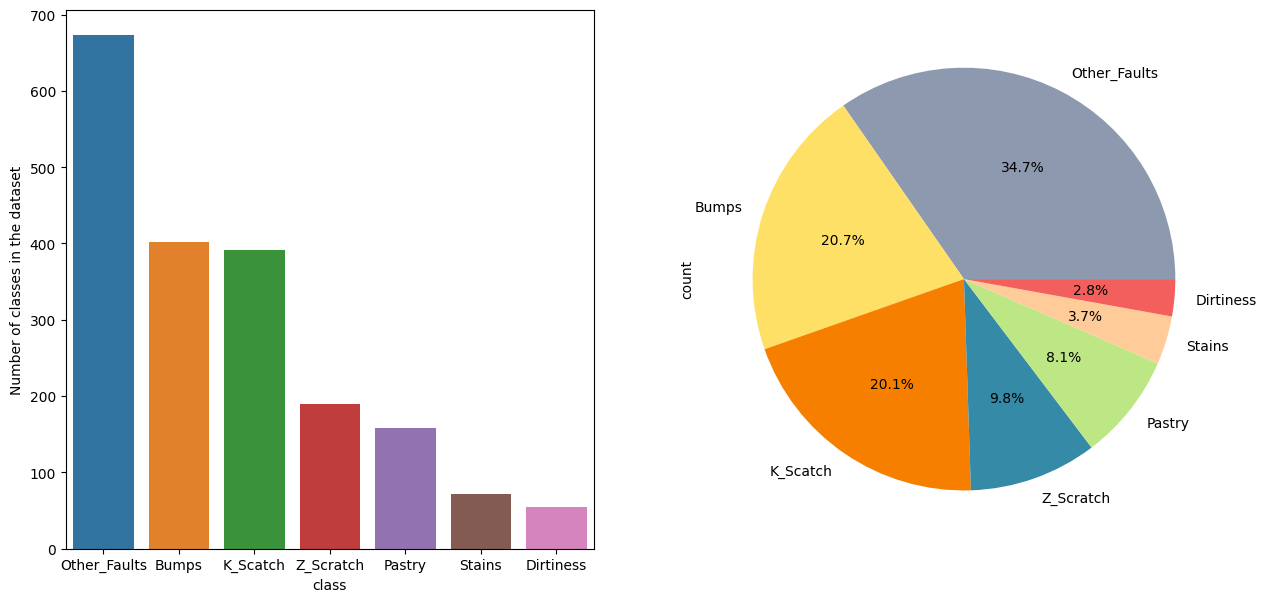

In [80]:
target_counts=df['class'].value_counts() 
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts_barplot = sns.barplot(x = target_counts.index,y = target_counts.values, ax = ax[0])
target_counts_barplot.set_ylabel('Number of classes in the dataset')

colors = ['#8d99ae','#ffe066', '#f77f00','#348aa7','#bce784','#ffcc99',  '#f25f5c']
target_counts.plot.pie(autopct="%1.1f%%", ax=ax[1], colors=colors)
# 다른 종류의 결함 여부, Bumps 결함 여부, K_Scatch 결함 여부 가 가장 높다
# 반면 stain과 dirtiness는 표본이 적어 모델링시 좋은 퍼포먼스가 나오지 않을 확률이 높음 -> 데이터 조정 필요

In [82]:
# TypeOfSteel_A300 TypeOfSteel_A400 Outside_Global_Index  - category 타입
df['TypeOfSteel_A300'] = df['TypeOfSteel_A300'].astype('category',copy=False)
df['TypeOfSteel_A400'] = df['TypeOfSteel_A400'].astype('category',copy=False)
df['Outside_Global_Index'] = df['Outside_Global_Index'].astype('category',copy=False)

<Axes: >

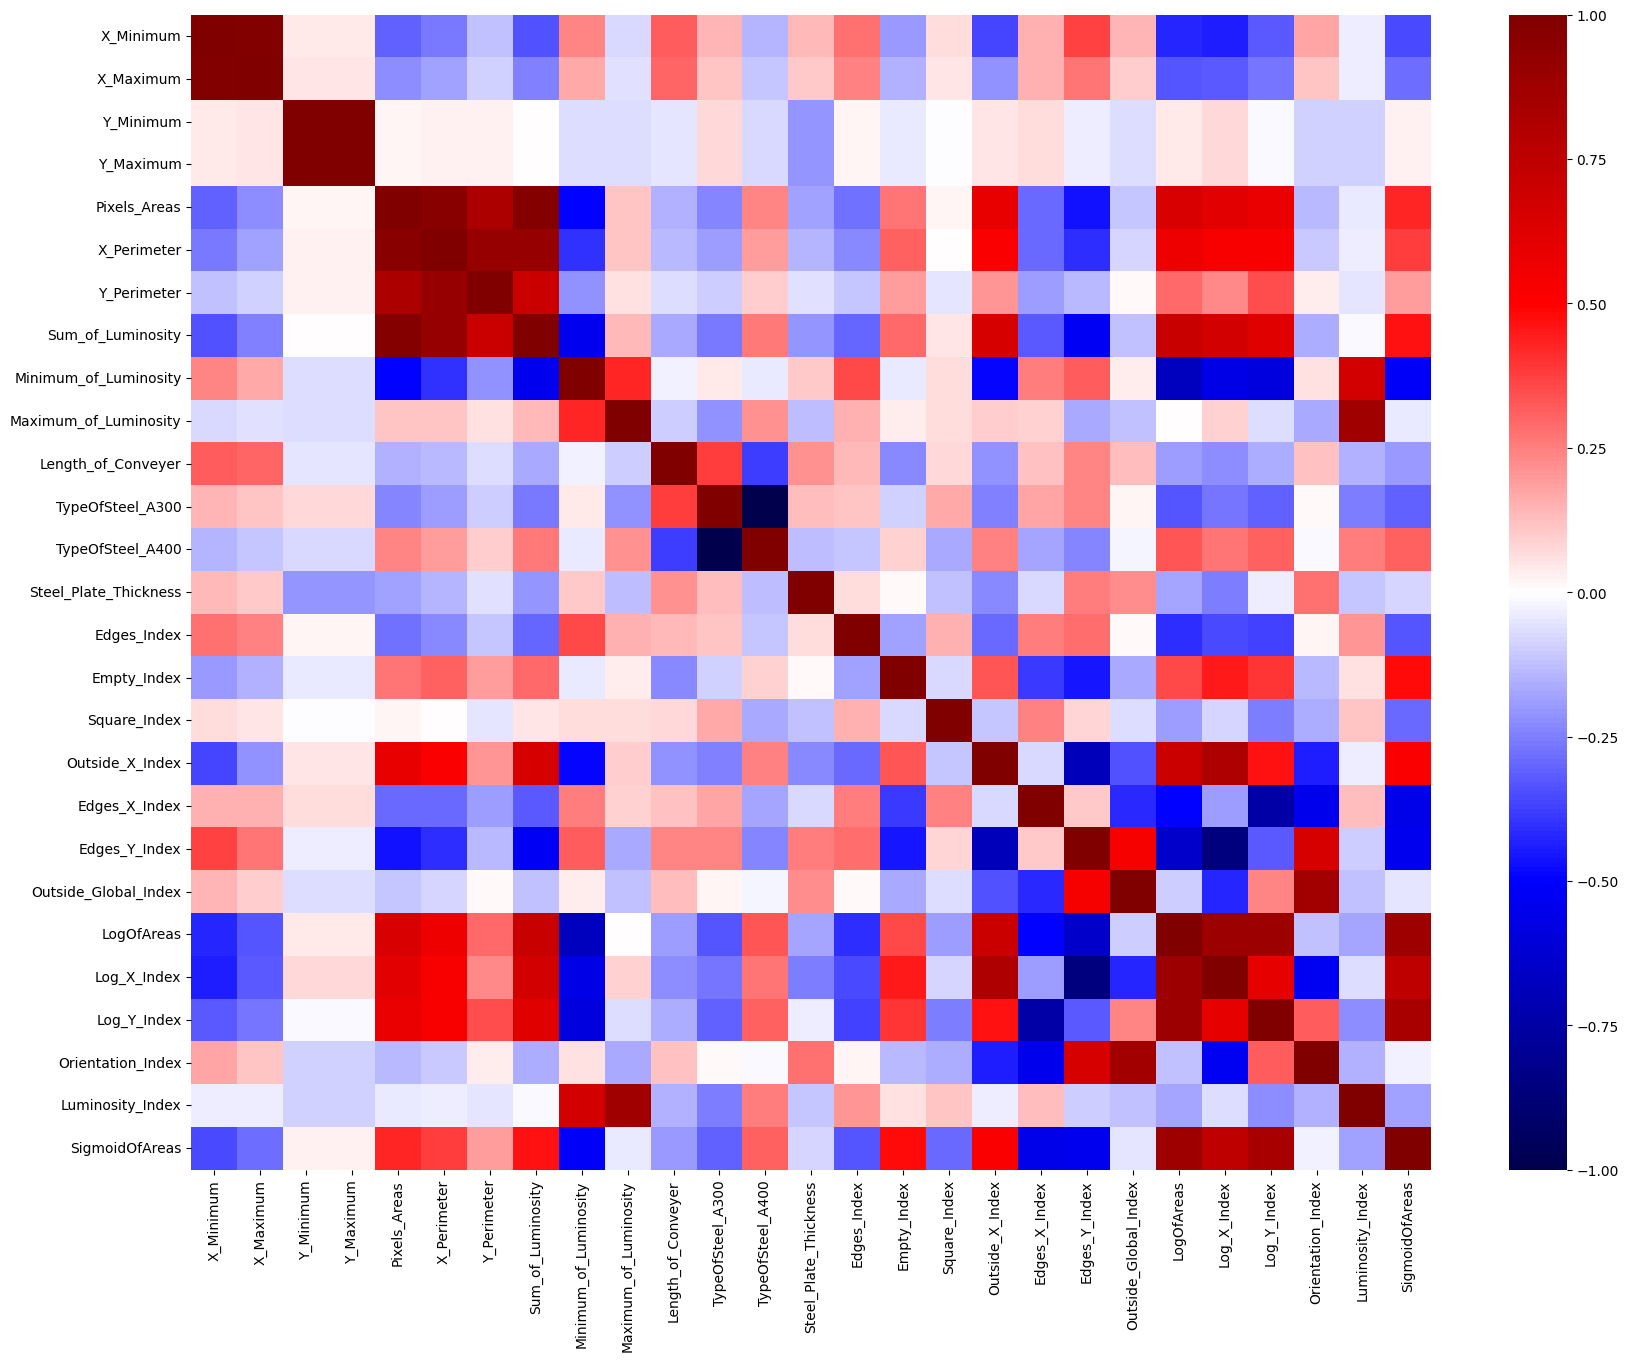

In [91]:
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,:-1].corr(), cmap='seismic')

In [97]:
cor = df.iloc[:,:-1].corr()[df.iloc[:,:-1].corr() > 0.5]
cor 

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  \
X_Minimum               1.000000   0.988314        NaN        NaN   
X_Maximum               0.988314   1.000000        NaN        NaN   
Y_Minimum                    NaN        NaN        1.0        1.0   
Y_Maximum                    NaN        NaN        1.0        1.0   
Pixels_Areas                 NaN        NaN        NaN        NaN   
X_Perimeter                  NaN        NaN        NaN        NaN   
Y_Perimeter                  NaN        NaN        NaN        NaN   
Sum_of_Luminosity            NaN        NaN        NaN        NaN   
Minimum_of_Luminosity        NaN        NaN        NaN        NaN   
Maximum_of_Luminosity        NaN        NaN        NaN        NaN   
Length_of_Conveyer           NaN        NaN        NaN        NaN   
TypeOfSteel_A300             NaN        NaN        NaN        NaN   
TypeOfSteel_A400             NaN        NaN        NaN        NaN   
Steel_Plate_Thickness        NaN        NaN        NaN        NaN   
Edges_Index                  NaN        NaN        NaN        NaN   
Empty_Index                  NaN        NaN        NaN        NaN   
Square_Index                 NaN        NaN        NaN        NaN   
Outside_X_Index              NaN        NaN        NaN        NaN   
Edges_X_Index                NaN        NaN        NaN        NaN   
Edges_Y_Index                NaN        NaN        NaN        NaN   
Outside_Global_Index         NaN        NaN        NaN        NaN   
LogOfAreas                   NaN        NaN        NaN        NaN   
Log_X_Index                  NaN        NaN        NaN        NaN   
Log_Y_Index                  NaN        NaN        NaN        NaN   
Orientation_Index            NaN        NaN        NaN        NaN   
Luminosity_Index             NaN        NaN        NaN        NaN   
SigmoidOfAreas               NaN        NaN        NaN        NaN   

                       Pixels_Areas  X_Perimeter  Y_Perimeter  \
X_Minimum                       NaN          NaN          NaN   
X_Maximum                       NaN          NaN          NaN   
Y_Minimum                       NaN          NaN          NaN   
Y_Maximum                       NaN          NaN          NaN   
Pixels_Areas               1.000000     0.966644     0.827199   
X_Perimeter                0.966644     1.000000     0.912436   
Y_Perimeter                0.827199     0.912436     1.000000   
Sum_of_Luminosity          0.978952     0.912956     0.704876   
Minimum_of_Luminosity           NaN          NaN          NaN   
Maximum_of_Luminosity           NaN          NaN          NaN   
Length_of_Conveyer              NaN          NaN          NaN   
TypeOfSteel_A300                NaN          NaN          NaN   
TypeOfSteel_A400                NaN          NaN          NaN   
Steel_Plate_Thickness           NaN          NaN          NaN   
Edges_Index                     NaN          NaN          NaN   
Empty_Index                     NaN          NaN          NaN   
Square_Index                    NaN          NaN          NaN   
Outside_X_Index            0.588606     0.517098          NaN   
Edges_X_Index                   NaN          NaN          NaN   
Edges_Y_Index                   NaN          NaN          NaN   
Outside_Global_Index            NaN          NaN          NaN   
LogOfAreas                 0.650234     0.563036          NaN   
Log_X_Index                0.603072     0.524716          NaN   
Log_Y_Index                0.578342     0.523472          NaN   
Orientation_Index               NaN          NaN          NaN   
Luminosity_Index                NaN          NaN          NaN   
SigmoidOfAreas                  NaN          NaN          NaN   

                       Sum_of_Luminosity  Minimum_of_Luminosity  \
X_Minimum                            NaN                    NaN   
X_Maximum                            NaN                    NaN   
Y_Minimum                            NaN                    NaN   
Y

In [132]:
numeric_features = df.dtypes[df.dtypes != "object"].index
skewed_features = df[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_features   # 비대칭 데이터가 많이 존재함

Outside_X_Index          4.117697
X_Perimeter              1.212400
Sum_of_Luminosity        1.195098
Y_Perimeter              1.181743
Pixels_Areas             1.164139
Steel_Plate_Thickness    1.161112
Length_of_Conveyer       0.840026
Log_X_Index              0.755042
LogOfAreas               0.747706
Edges_Index              0.685241
Luminosity_Index         0.678814
X_Maximum                0.523804
X_Minimum                0.500510
Log_Y_Index              0.444757
TypeOfSteel_A300         0.406934
Empty_Index              0.293241
SigmoidOfAreas           0.125691
Square_Index            -0.056262
Minimum_of_Luminosity   -0.107015
Orientation_Index       -0.153327
Maximum_of_Luminosity   -0.215980
Edges_X_Index           -0.234914
Outside_Global_Index    -0.306185
Y_Maximum               -0.332704
Y_Minimum               -0.332971
TypeOfSteel_A400        -0.406934
Edges_Y_Index           -1.046865
dtype: float64

<Axes: xlabel='Y_Perimeter', ylabel='Density'>

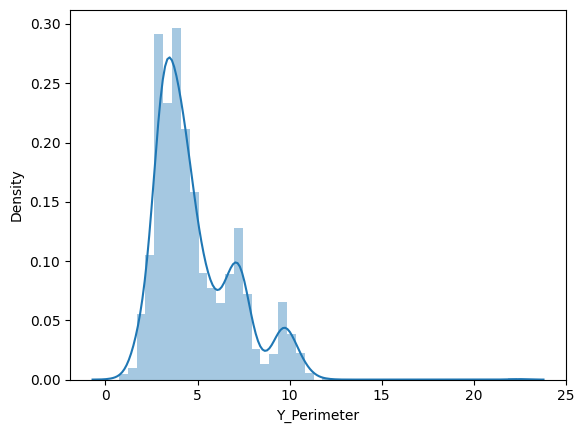

In [130]:
sns.distplot(df['Y_Perimeter']) 

In [128]:
# 비대칭 데이터 정규분포 형태로 변환
skewed_features =skewed_features[abs(skewed_features) > 0.75]

from scipy.special import boxcox1p
lam = 0.15
cols = skewed_features.index

for c in cols:
    df[c] = boxcox1p(df[c], lam)

<Axes: xlabel='Y_Perimeter', ylabel='Density'>

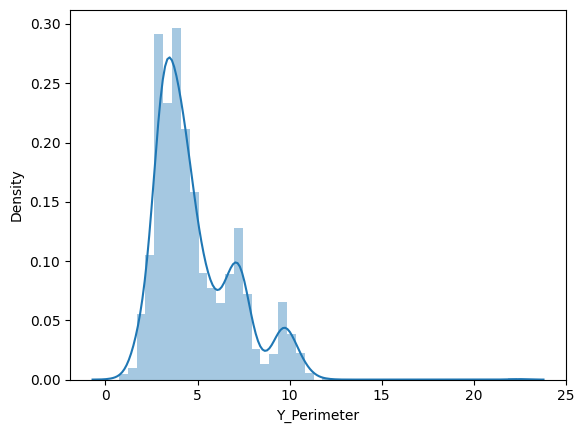

In [131]:
sns.distplot(df['Y_Perimeter'])

In [136]:
# 데이터 스케일링
features = df.drop('class', axis=1)
target = df['class']

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features_scaled

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0     -1.016481  -1.141639  -1.053504  -1.053558     -0.202883    -0.644736   
1      0.141894   0.066403   0.825835   0.825841     -0.598533    -0.941552   
2      0.495362   0.436253   0.358130   0.358094     -0.763687    -1.056348   
3      0.541467   0.486504  -0.829160  -0.829220     -0.391966    -0.798942   
4      1.379032   1.382988  -0.602734  -0.602464      1.020129     0.192685   
...         ...        ...        ...        ...           ...          ...   
1936  -0.618830  -0.685357  -0.921283  -0.921405     -0.192457     0.115542   
1937  -0.820537  -0.890382  -0.888887  -0.889006     -0.168863    -0.030599   
1938  -0.818616  -0.892392  -0.794937  -0.795055     -0.160673    -0.096914   
1939  -0.833984  -0.900432  -0.728636  -0.728721      0.015610     0.561620   
1940   1.325243   1.332737  -1.785244  -1.785368     -0.617755    -0.383356   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0        0.124129          -0.285926              -0.266099   
1       -0.172465          -0.612327              -0.017079   
2       -0.500687          -0.754645               0.449832   
3        0.142144          -0.395179               0.449832   
4        1.770064           0.986082              -1.480069   
...           ...                ...                    ...   
1936    -0.398349          -0.112127               1.072381   
1937    -0.336265          -0.118155               0.854489   
1938    -0.398349          -0.078083               1.103509   
1939     0.177198           0.091834               1.010126   
1940    -0.398349          -0.602207               0.512087   

      Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
0                 -1.242952  ...        -0.519330      -0.575331   
1                 -0.340684  ...        -0.540410      -0.043290   
2                 -0.227493  ...        -0.538493       0.573451   
3                 -0.171469  ...        -0.509754      -0.296153   
4                 -0.171469  ...        -0.368507      -1.345434   
...                     ...  ...              ...            ...   
1936               0.626857  ...        -0.216790      -0.378385   
1937               0.210528  ...        -0.175246       0.386784   
1938               0.575923  ...        -0.203563       0.470661   
1939               0.575923  ...        -0.146963      -1.111484   
1940               0.210528  ...        -0.328583       0.652393   

      Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
0          0.773365              0.879804   -0.083538    -0.953168   
1          0.649673              0.879804   -0.581936    -1.290349   
2          0.577166              0.879804   -0.812814    -1.290349   
3          0.773365              0.879804   -0.313021    -1.107330   
4          0.730848              0.879804    1.127655    -0.151148   
...             ...                   ...         ...          ...   
1936      -0.296099             -1.193905   -0.071239     0.326212   
1937      -0.375846             -1.193905   -0.043727     0.419138   
1938      -0.488339             -1.193905   -0.034218     0.358328   
1939      -0.583745             -1.193905    0.164584     0.475423   
1940      -0.296099             -1.193905   -0.608054     0.008323   

      Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0        0.528872           1.467656         -1.075752       -0.009490  
1        0.130174           1.417530         -0.297824       -0.845759  
2       -0.325764           1.165103          0.057185       -1.091513  
3        0.550227           1.519978         -0.171419       -0.189237  
4        2.216130           1.698514         -0.456503        1.221636  
...           ...                ...               ...             ...  
1936    -0.438483          -1.022264          0.900332        0.412476  
1937    -0.380362          -1.068196          0.491534    

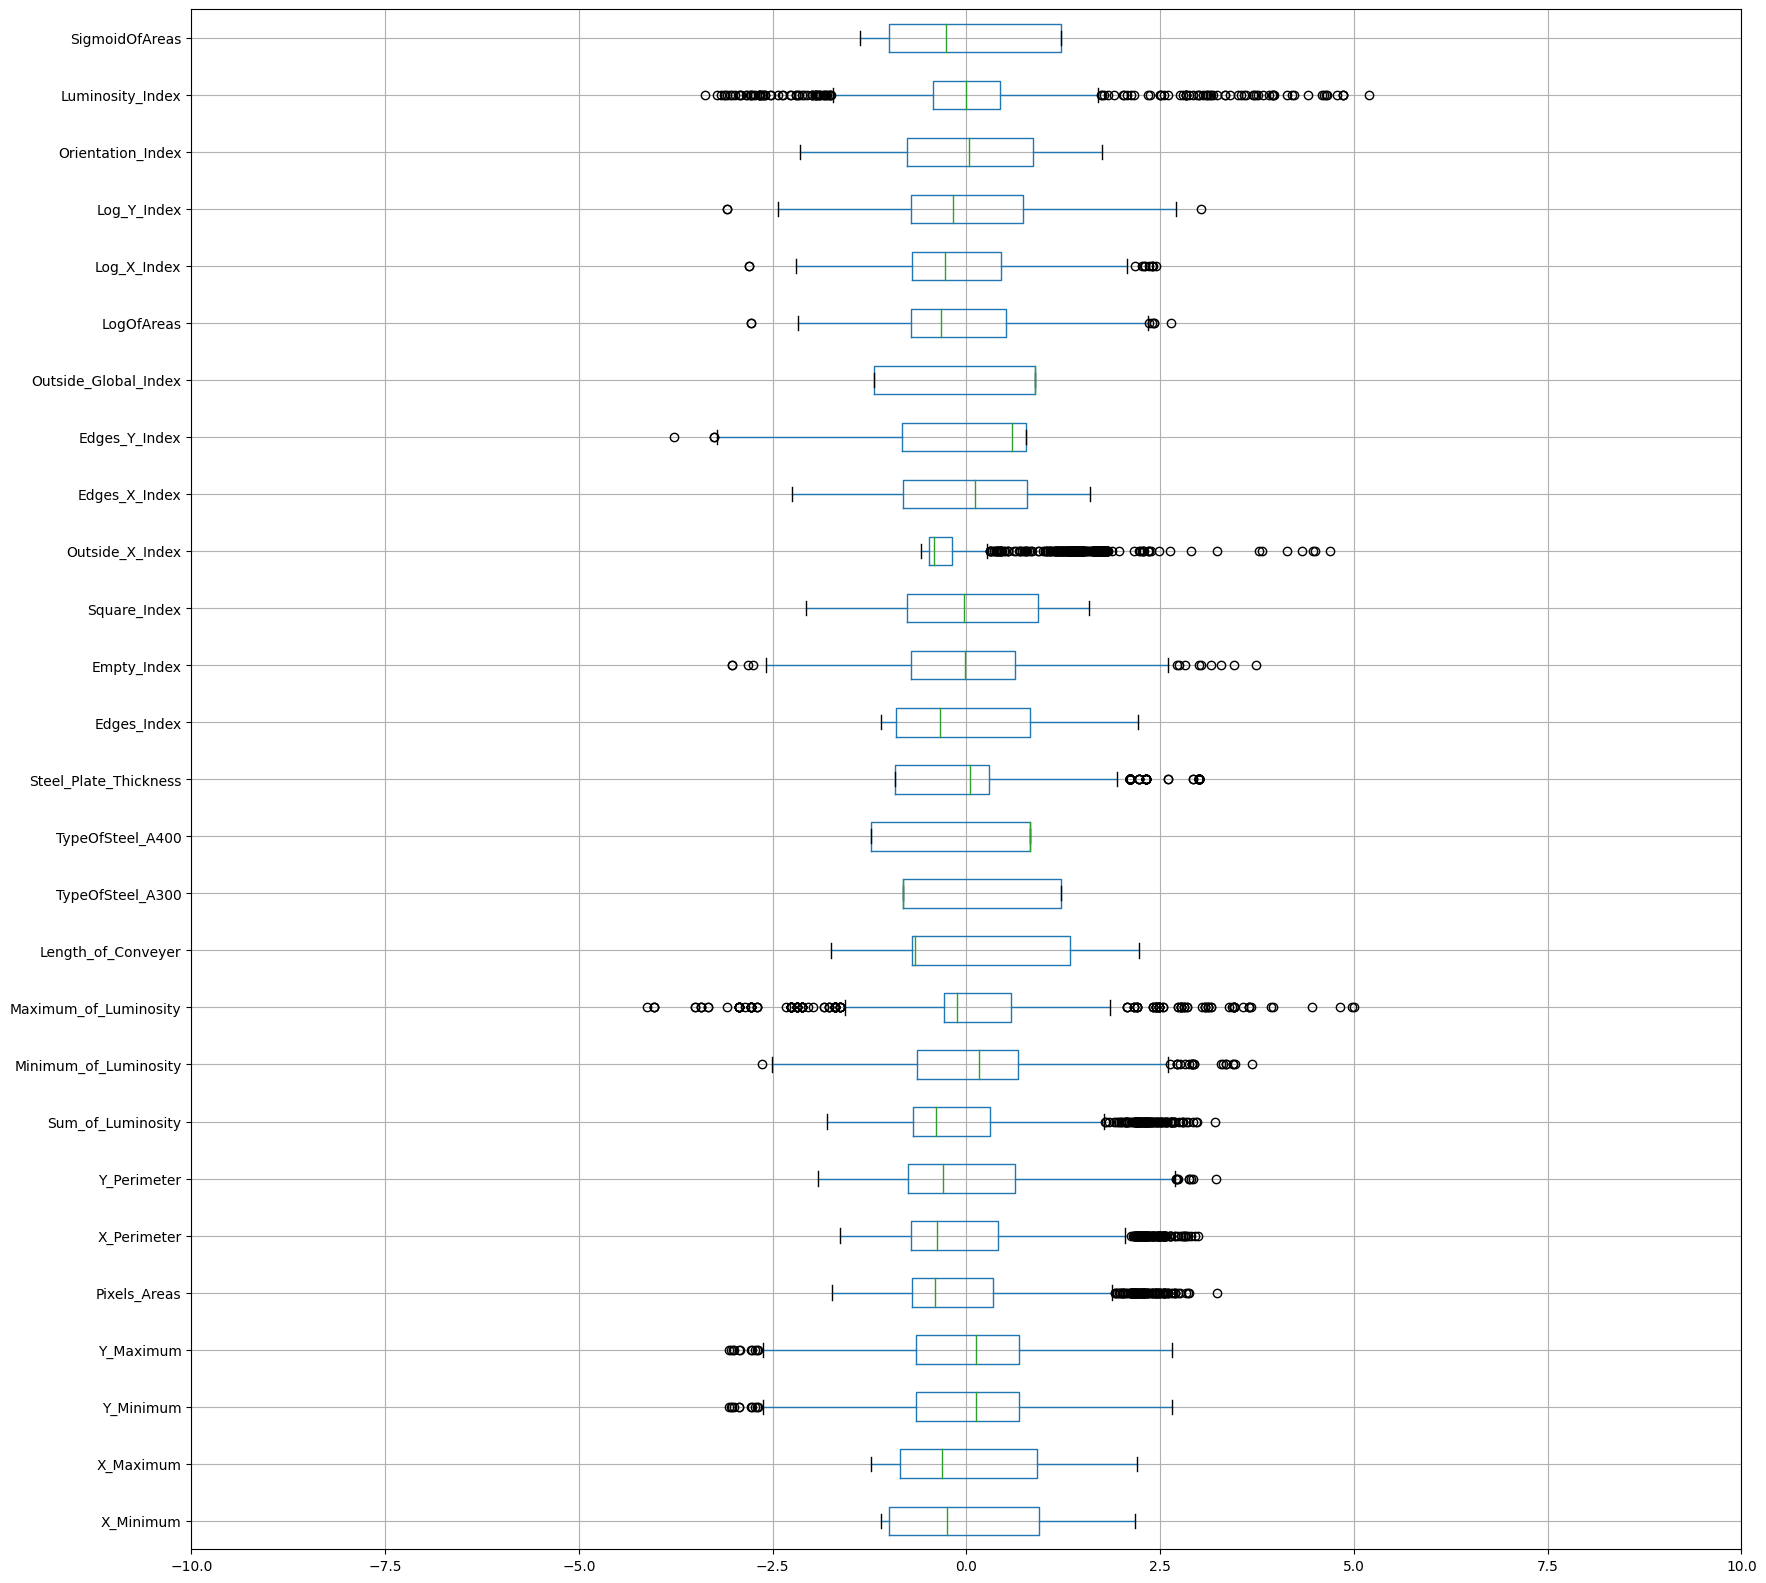

In [147]:
data_boxplot = features_scaled.boxplot(return_type='dict', vert=False, figsize=(20,20)) 
plt.xlim(-10, 10)
plt.show()
# 비대칭 데이터 제거, 표준화 작업 이후에도 이상치 여전히 존재 -> 극단적 이상치 직접 삭제 

In [144]:
features_scaled = features_scaled[features_scaled['Pixels_Areas']<4]
features_scaled = features_scaled[features_scaled['X_Perimeter']<5]
features_scaled = features_scaled[features_scaled['Y_Perimeter']<7]
features_scaled = features_scaled[features_scaled['Sum_of_Luminosity']<4]
features_scaled = features_scaled[features_scaled['Maximum_of_Luminosity']>-7]
features_scaled = features_scaled[features_scaled['Outside_X_Index']<5]
features_scaled = features_scaled[features_scaled['Log_Y_Index']<5]
features_scaled = features_scaled[features_scaled['Luminosity_Index']>-5]

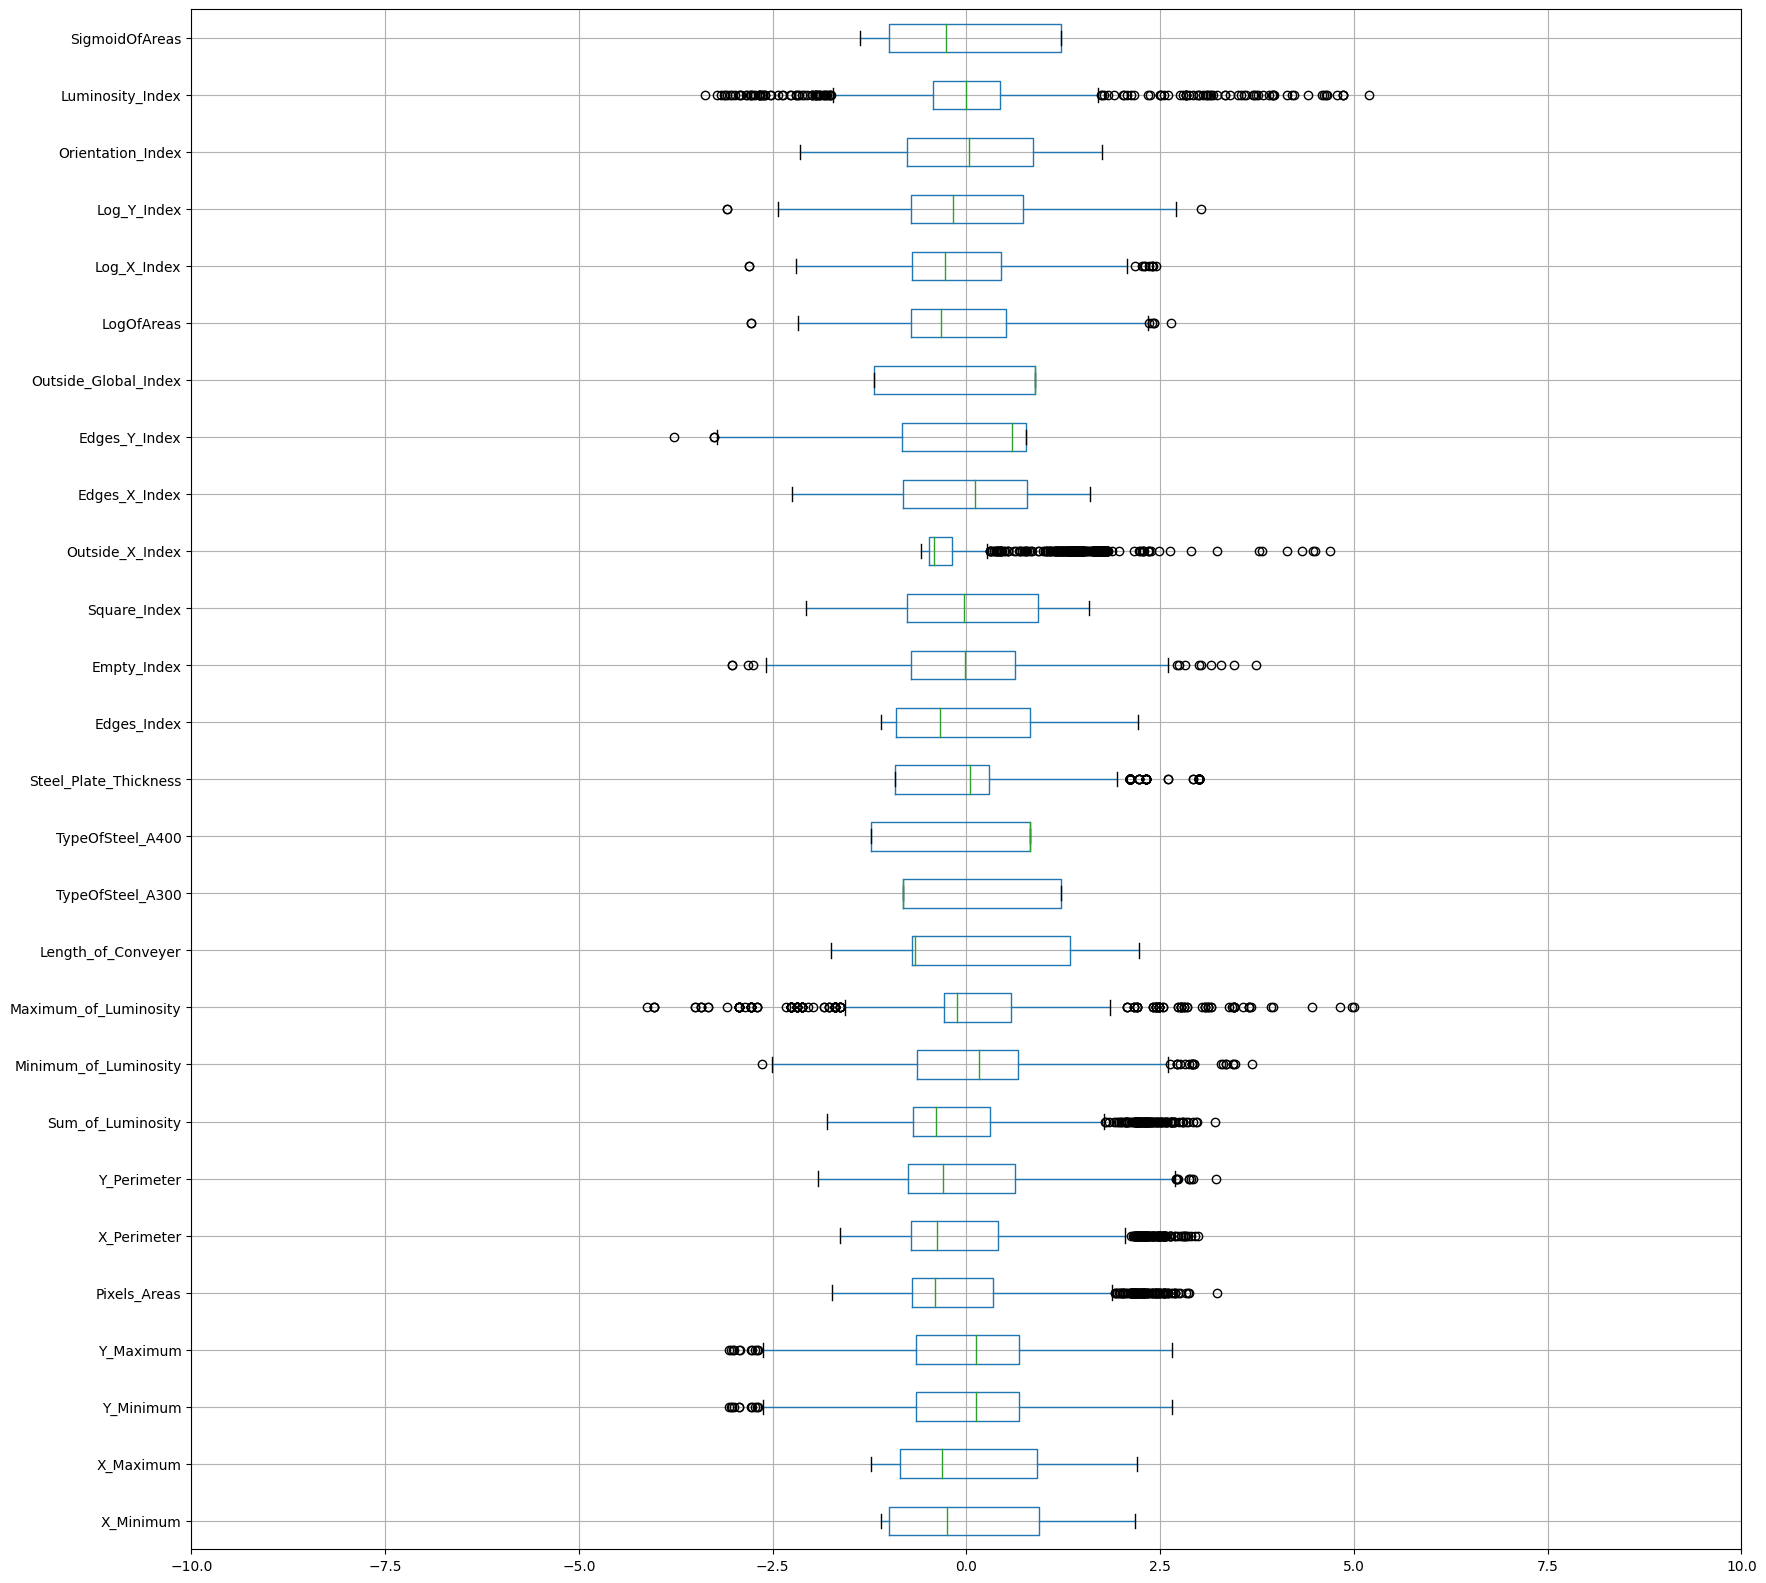

In [146]:
data_boxplot = features_scaled.boxplot(return_type='dict', vert=False, figsize=(20,20)) 
plt.xlim(-10, 10)
plt.show()

In [149]:
target.value_counts()

class
Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: count, dtype: int64

In [154]:
df.shape

(1941, 28)

In [173]:
df_1 = features_scaled.iloc[:,1:10]
df_1['class']= df['class']  # 시각화를 위해 임의로 추출한 컬럼들만 나타냄

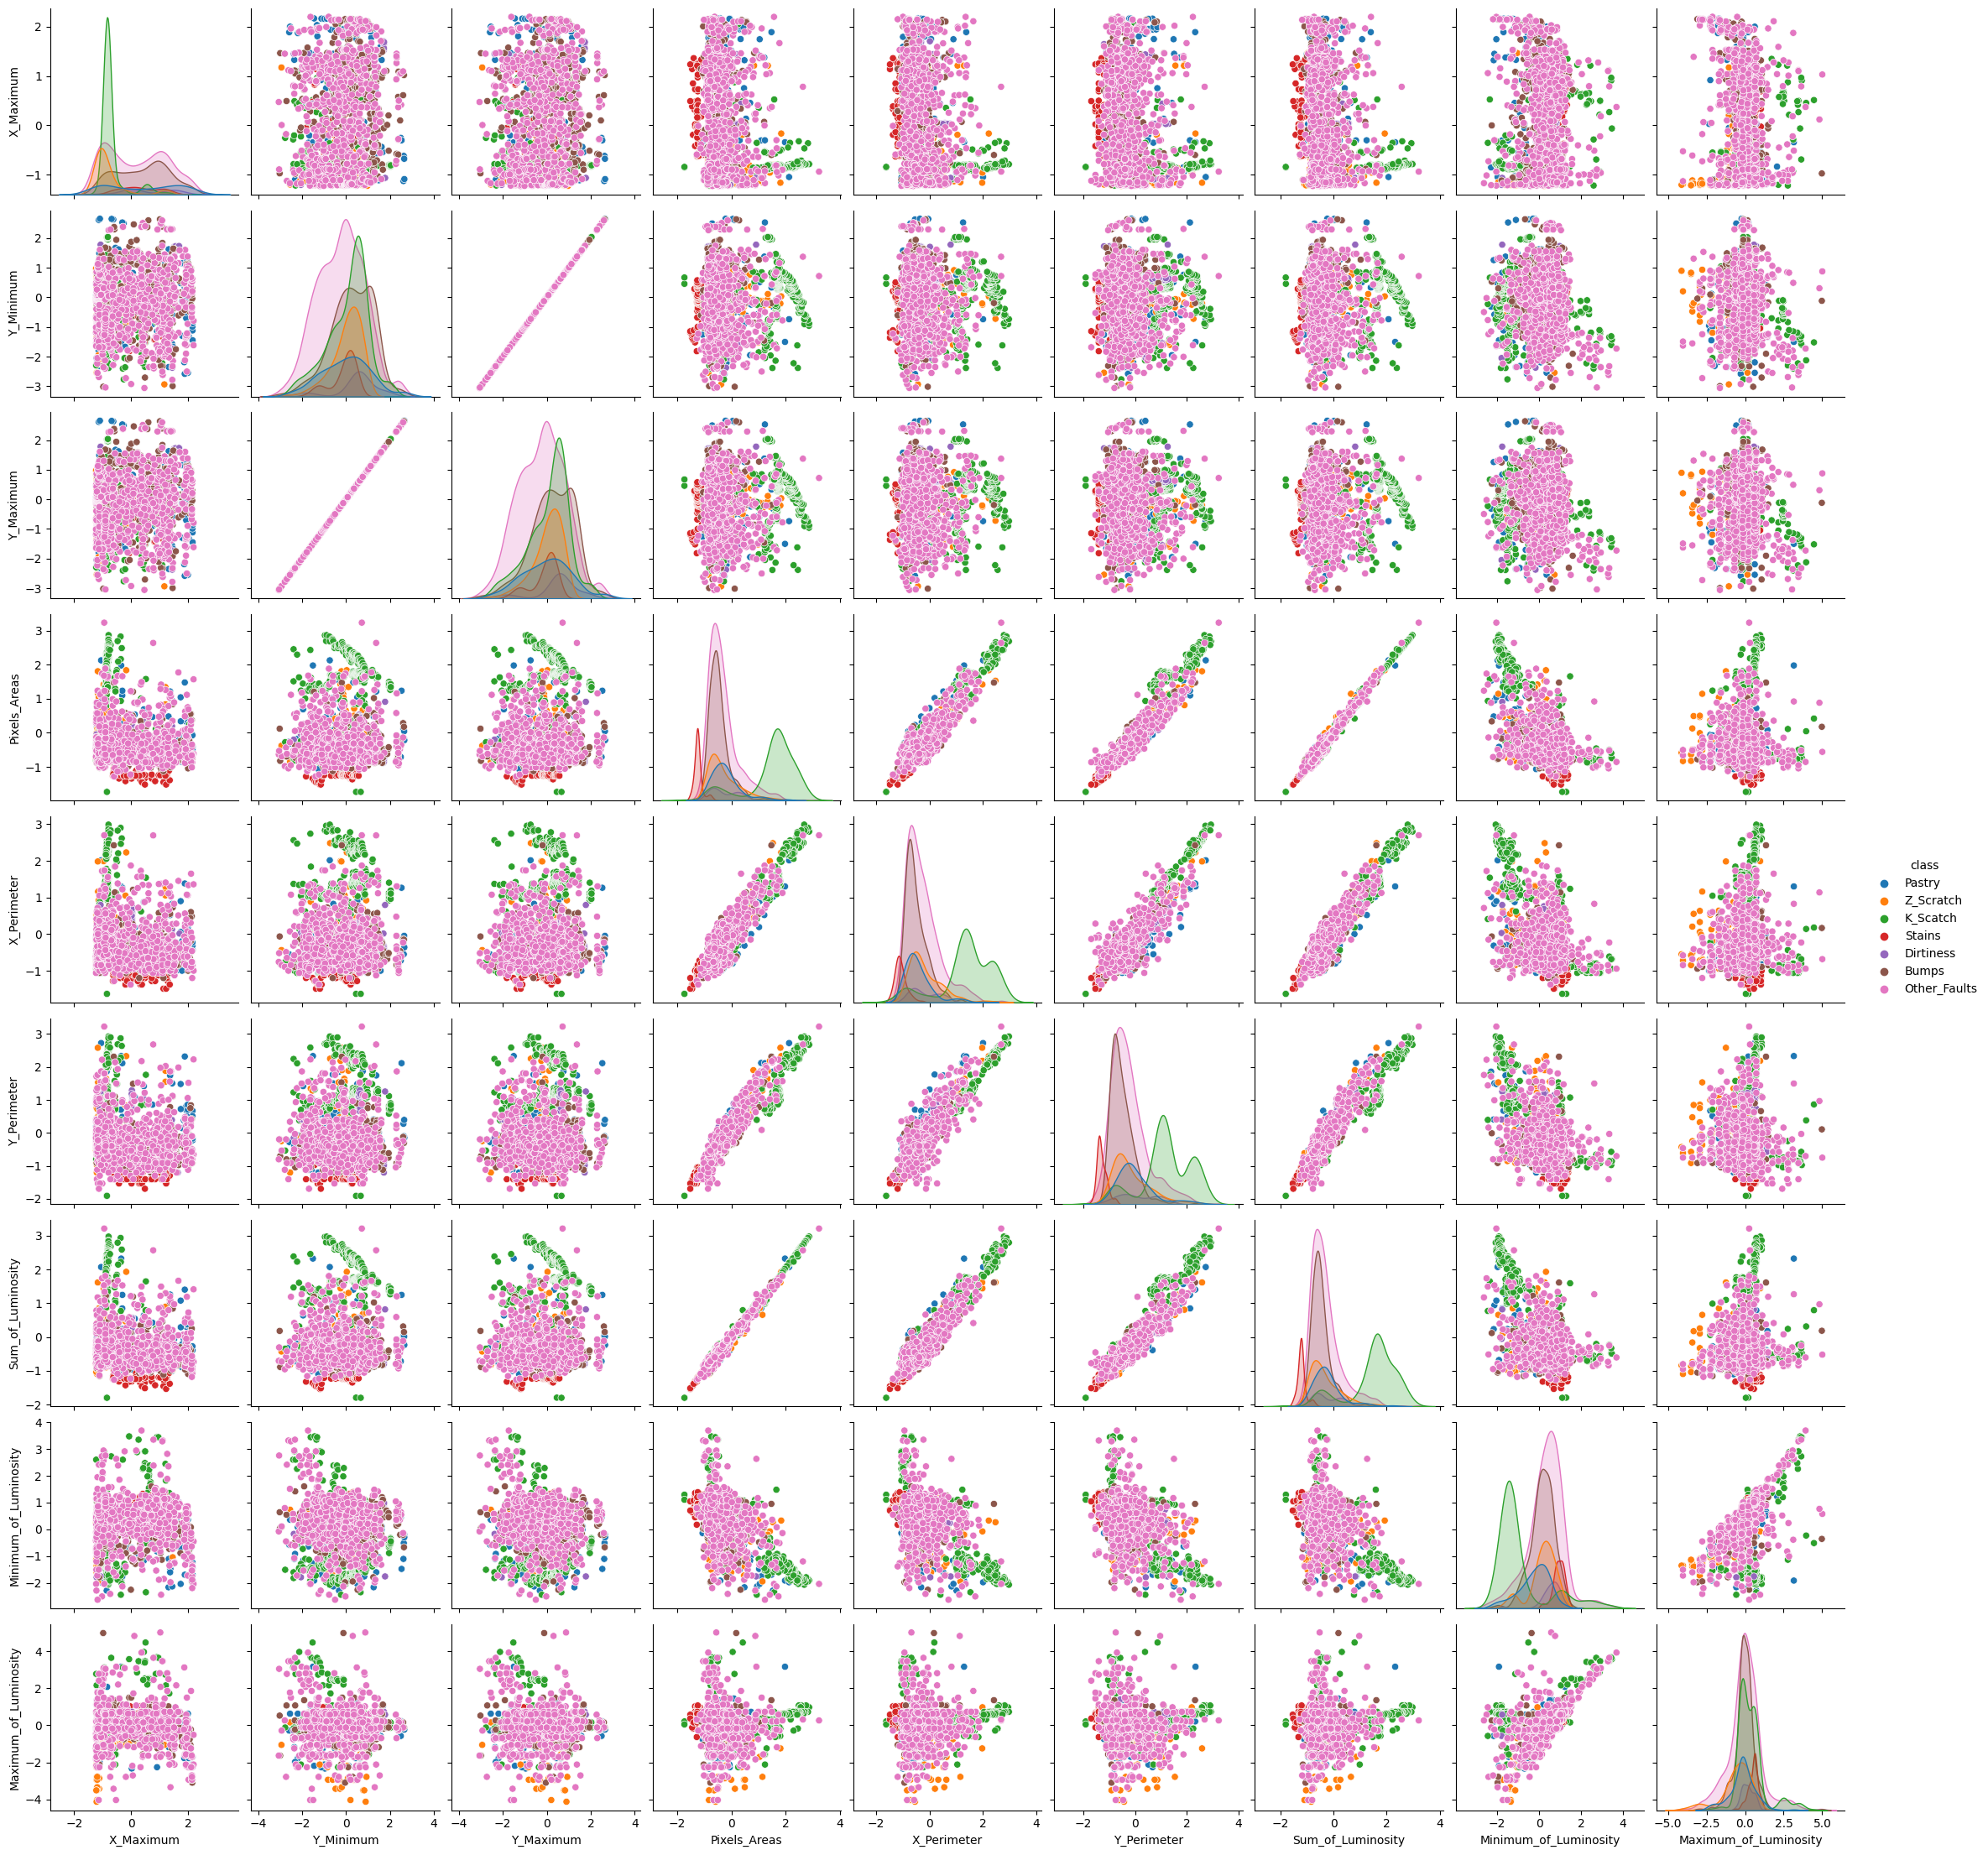

In [176]:
sns.pairplot(df_1,hue='class')
plt.show() # other_faults 비율이 너무 높다 비중 조절 필수

In [177]:
features_scaled

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0     -1.016481  -1.141639  -1.053504  -1.053558     -0.202883    -0.644736   
1      0.141894   0.066403   0.825835   0.825841     -0.598533    -0.941552   
2      0.495362   0.436253   0.358130   0.358094     -0.763687    -1.056348   
3      0.541467   0.486504  -0.829160  -0.829220     -0.391966    -0.798942   
4      1.379032   1.382988  -0.602734  -0.602464      1.020129     0.192685   
...         ...        ...        ...        ...           ...          ...   
1936  -0.618830  -0.685357  -0.921283  -0.921405     -0.192457     0.115542   
1937  -0.820537  -0.890382  -0.888887  -0.889006     -0.168863    -0.030599   
1938  -0.818616  -0.892392  -0.794937  -0.795055     -0.160673    -0.096914   
1939  -0.833984  -0.900432  -0.728636  -0.728721      0.015610     0.561620   
1940   1.325243   1.332737  -1.785244  -1.785368     -0.617755    -0.383356   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0        0.124129          -0.285926              -0.266099   
1       -0.172465          -0.612327              -0.017079   
2       -0.500687          -0.754645               0.449832   
3        0.142144          -0.395179               0.449832   
4        1.770064           0.986082              -1.480069   
...           ...                ...                    ...   
1936    -0.398349          -0.112127               1.072381   
1937    -0.336265          -0.118155               0.854489   
1938    -0.398349          -0.078083               1.103509   
1939     0.177198           0.091834               1.010126   
1940    -0.398349          -0.602207               0.512087   

      Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
0                 -1.242952  ...        -0.519330      -0.575331   
1                 -0.340684  ...        -0.540410      -0.043290   
2                 -0.227493  ...        -0.538493       0.573451   
3                 -0.171469  ...        -0.509754      -0.296153   
4                 -0.171469  ...        -0.368507      -1.345434   
...                     ...  ...              ...            ...   
1936               0.626857  ...        -0.216790      -0.378385   
1937               0.210528  ...        -0.175246       0.386784   
1938               0.575923  ...        -0.203563       0.470661   
1939               0.575923  ...        -0.146963      -1.111484   
1940               0.210528  ...        -0.328583       0.652393   

      Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
0          0.773365              0.879804   -0.083538    -0.953168   
1          0.649673              0.879804   -0.581936    -1.290349   
2          0.577166              0.879804   -0.812814    -1.290349   
3          0.773365              0.879804   -0.313021    -1.107330   
4          0.730848              0.879804    1.127655    -0.151148   
...             ...                   ...         ...          ...   
1936      -0.296099             -1.193905   -0.071239     0.326212   
1937      -0.375846             -1.193905   -0.043727     0.419138   
1938      -0.488339             -1.193905   -0.034218     0.358328   
1939      -0.583745             -1.193905    0.164584     0.475423   
1940      -0.296099             -1.193905   -0.608054     0.008323   

      Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0        0.528872           1.467656         -1.075752       -0.009490  
1        0.130174           1.417530         -0.297824       -0.845759  
2       -0.325764           1.165103          0.057185       -1.091513  
3        0.550227           1.519978         -0.171419       -0.189237  
4        2.216130           1.698514         -0.456503        1.221636  
...           ...                ...               ...             ...  
1936    -0.438483          -1.022264          0.900332        0.412476  
1937    -0.380362          -1.068196          0.491534    

In [178]:
# 데이터 분류
X = features_scaled
Y = df['class']

In [182]:
!pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.7 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 8.5 MB/s eta 0:00:00
     -------------------------------------- 422.4/422.4 kB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 93.9/93.9 kB ? eta

In [183]:
# 모델의 설정
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16,  input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=50, batch_size=1)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

ValueError: Data cardinality is ambiguous:
  x sizes: 1926
  y sizes: 1941
Make sure all arrays contain the same number of samples.